# Sensor current histograms

This is some documentation. Can have markup, images, math, etc.

In [4]:
from rhapi import RhApi
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

from ipywidgets import widgets
from IPython.display import display

In [5]:
%matplotlib inline
url = "http://dbloader-tracker:8113"

In [6]:
rh = RhApi(url, debug = True)

RhApi:url = http://dbloader-tracker:8113/


Again, lets take 'Tracker Sensor Initial Tests' data (table c1020).\
See rhapi-101 for selection example.\
We select all the parts (aka sensors) that have some data.

In [8]:
parts = pd.read_csv(StringIO(rh.csv("select c.PART_SERIAL_NUMBER from trker_int2r.c1020 c group by c.PART_SERIAL_NUMBER")), sep=",")

RhApi:http://dbloader-tracker:8113/query?with payload"select c.PART_SERIAL_NUMBER from trker_int2r.c1020 c group by c.PART_SERIAL_NUMBER"and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:http://dbloader-tracker:8113/query/o177865c6617?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:http://dbloader-tracker:8113/query/o177865c6617/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:http://dbloader-tracker:8113/query/o177865c6617/data?with payloadNoneand headers{'Accept': 'text/csv'}
RhApi:Response200text/csv; charset=UTF-8


Now we define a function that accepts sensor serial number and output widget (location) does the trick

In [9]:
def plots(sn, out):
    df = pd.read_csv(StringIO(rh.csv("select c.VOLTS, c.CURRNT_NAMP from trker_int2r.c1020 c where c.PART_SERIAL_NUMBER = :a order by c.VOLTS", {'a': sn})), sep=",")
    with out:
        fig = plt.figure(figsize=(8, 6))
        df['CURRNT_NAMP'].plot.hist(bins = 20, title = sn)
        plt.show(fig)

This is the GUI (widgets) that glue everything together

In [10]:
dd = widgets.Dropdown(options = parts.values.flatten(), description = 'Sensor')
but = widgets.Button(description = 'Plot')

out = widgets.Output()
box = widgets.VBox([widgets.HBox([dd,but]), out])
display(box)

def do_plots(b):
    plots(dd.value, out)
    out.clear_output(wait = True)

but.on_click(do_plots)

RhApi:http://dbloader-tracker:8113/query?with payload"select c.VOLTS, c.CURRNT_NAMP from trker_int2r.c1020 c where c.PART_SERIAL_NUMBER = :a order by c.VOLTS"and headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:http://dbloader-tracker:8113/query/o177865c6618?_verbose=Truewith payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8
RhApi:http://dbloader-tracker:8113/query/o177865c6618/count?with payloadNoneand headersNone
RhApi:Response200text/plain; charset=UTF-8
RhApi:http://dbloader-tracker:8113/query/o177865c6618/data?a=33234-018_PSS_MAINAwith payloadNoneand headers{'Accept': 'text/csv'}
RhApi:Response200text/csv; charset=UTF-8


In [52]:
qid = rh.qid("select c.CURRNT_NAMP from trker_int2r.c1020 c where c.CURRNT_NAMP >= 0")
qid

RhApi:http://dbloader-tracker:8113/query?with payload"select c.CURRNT_NAMP from trker_int2r.c1020 c where c.CURRNT_NAMP >= 0"and headersNone
RhApi:Response200text/plain; charset=UTF-8


'o1775ba016b2'

In [53]:
rh.clean(qid)

RhApi:http://dbloader-tracker:8113/query/o1775ba016b2/cache?with payloadNoneand headersNone
RhApi:Response204None


In [54]:
histo = rh.histo(qid, 'CURRNT_NAMP', 20)
histo = np.array(histo['bins'])

RhApi:http://dbloader-tracker:8113/query/o1775ba016b2/histo/CURRNT_NAMP/20?with payloadNoneand headersNone
RhApi:Response200application/json; charset=UTF-8


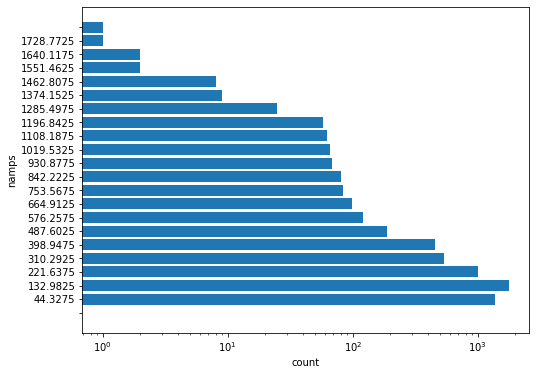

In [55]:
fig = plt.figure(figsize=(8, 6))
plt.barh(histo[:,0], histo[:,4], tick_label = histo[:,1], log = True)
plt.xlabel("count")
plt.ylabel("namps")
plt.show(fig)